In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import datetime

In [9]:
def parser(x):
    return datetime.strptime(x, '%b-%y')

data = pd.read_csv('D:/Study/DataScience/TimeSeries/sales.csv', index_col = 0, parse_dates= [0], date_parser = parser)

data.head()

,Sales
Month,
1995-01-01,185041
1995-02-01,183819
1995-03-01,265239
1995-04-01,238523
1995-05-01,166799


In [10]:
sales_data = data.copy()

sales_data = sales_data.sort_index()

sales_data_train = sales_data.iloc[0:172]
sales_data_test = sales_data.iloc[172:]

In [11]:
print(sales_data.shape)
print(sales_data_train.shape)
print(sales_data_test.shape)

(216, 1)
(172, 1)
(44, 1)


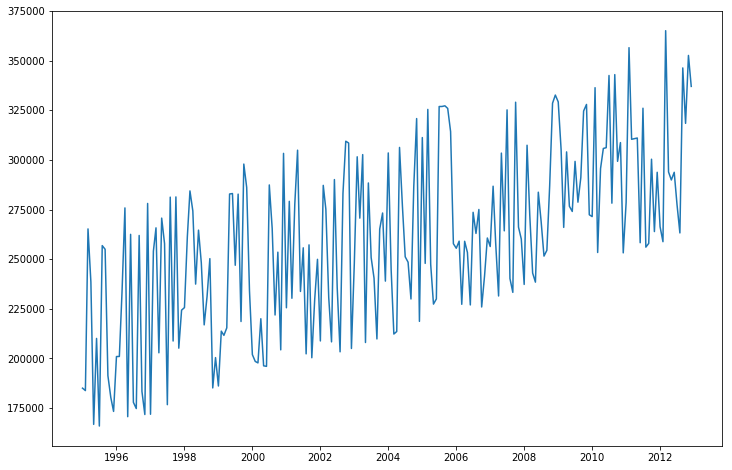

In [12]:
plt.figure(figsize=(12,8))
plt.plot(sales_data)
plt.show()

In [13]:
sales = sales_data.copy()

sales_diff = sales.diff(periods=1)

sales_diff.head()

,Sales
Month,
1995-01-01,NaN
1995-02-01,-1222.0
1995-03-01,81420.0
1995-04-01,-26716.0
1995-05-01,-71724.0


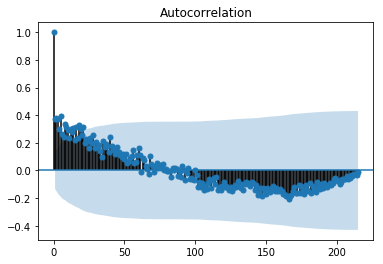

<Figure size 1440x720 with 0 Axes>

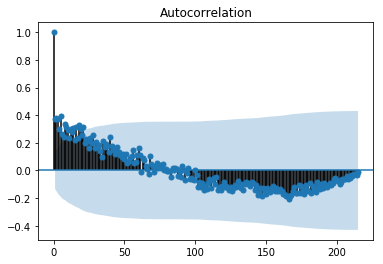

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,10))
plot_acf(sales)

In [50]:
import itertools

p = list(range(0,1))
d = list(range(0,1))
q = list(range(0,3))

pdq = list(itertools.product(p,d,q))

In [57]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

scores = []

for k in pdq:
    model = ARIMA(sales_data_train.astype('float64'), order=k)
    model_fit = model.fit()
    predicted = model_fit.predict(start='2009-05-01', end='2012-12-01')
    rmse = np.sqrt(mean_squared_error(sales_data_test,predicted))
    #scores.append(rmse)
    #print(rmse)
    print(k,np.round(rmse,2))

(0, 0, 0) 57737.48
(0, 0, 1) 57649.74
(0, 0, 2) 57586.33


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\sign